In [89]:
from IPython.core.display import display, HTML
display(HTML\
        ("<style>.container { \
        width:100% !important; \
        }</style>"))
display(HTML\
        ("<style>.input_prompt{ \
        min-width: 1ex; \
        }</style>"))

In [90]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
# import matplotlib as mpl
# mpl.use('Agg')

import pandas as pd
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np
pd.set_option('max_colwidth', 400)


In [91]:
path = './'

In [94]:
positivo = pd.read_csv(path+'positivo_multi_index_einstein.csv',delimiter='|', error_bad_lines=False, encoding="utf-8")
negativo = pd.read_csv(path+'negativo_multi_index_einstein.csv',delimiter='|', error_bad_lines=False, encoding="utf-8")

In [95]:
total = pd.concat([positivo, negativo])

In [96]:
total['id'] = total['id_paciente']

In [97]:
positivo['id_paciente'] = positivo['id_paciente'].astype('str')
negativo['id_paciente'] = negativo['id_paciente'].astype('str')

In [98]:
ids_positivo = positivo['id_paciente'].unique()
ids_negativo = negativo['id_paciente'].unique()

In [99]:
print(len(ids_positivo)+ len(ids_negativo))

46535


In [100]:
total = total.set_index(['id_paciente','dt_coleta']).sort_index()

In [101]:
total[ total.id == '00006490d57666d73747c29c01079b60b1353002'].id.str.contains('covid')

id_paciente                               dt_coleta 
00006490d57666d73747c29c01079b60b1353002  2020-05-24    False
                                          2020-05-24    False
                                          2020-05-24    False
                                          2020-05-24    False
                                          2020-05-24    False
                                          2020-05-24    False
                                          2020-05-24    False
                                          2020-05-24    False
                                          2020-05-24    False
                                          2020-05-24    False
                                          2020-05-24    False
                                          2020-05-24    False
                                          2020-05-24    False
                                          2020-05-24    False
                                          2020-05-24    False
                 

In [ ]:
positivo = pd.read_csv(path+'covid19_positivo.csv',delimiter='|', error_bad_lines=False, encoding="utf-8")
negativo = pd.read_csv(path+'covid19_negativo.csv',delimiter='|', error_bad_lines=False, encoding="utf-8")

30


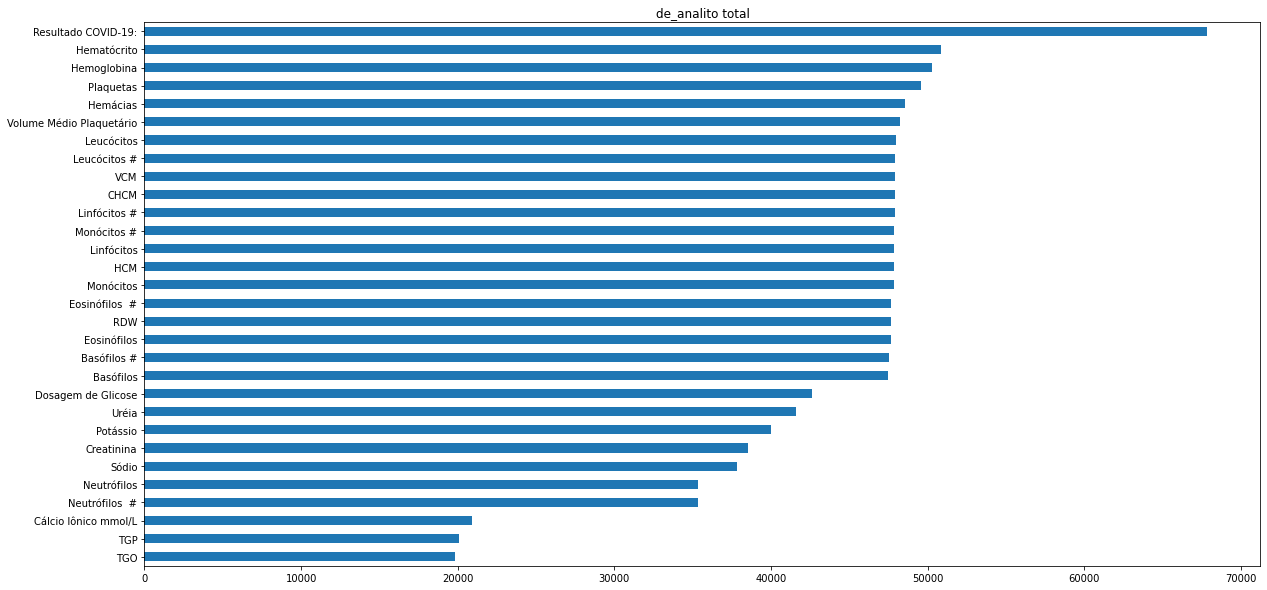

In [ ]:
fig = plt.figure(figsize=[20,10])
s = total['de_analito'].value_counts()[0:30].sort_values(ascending=True)
analitos_names = s.index
print(len(analitos_names))
s.plot.barh()
plt.title('de_analito total')
plt.show()

In [ ]:
observed = ['TGO','TGP','Neutrófilos #','Creatinina','Uréia','Basófilos #','Eosinófilos #','Monócito #','Linfócitos #','VCM','Leucócitos #']

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=[24,20])
qqq = []
i = 0
thresh = 0.15

values_pos = []
values_neg = []

for names in analitos_names:
    for obs in observed:
        if obs == names:
            print(obs)
            s1 = positivo[ positivo['de_analito'].str[:] == names]['de_resultado']
            s2 = negativo[ negativo['de_analito'].str[:] == names]['de_resultado']

            s1 = pd.to_numeric(s1,errors='coerce')
#             values_pos.append(s1.get_values())
#             qqq.append(s1.describe())
#             a = len(s1.get_values())
#             print(a, end =', ')
#             s1 = s1[~(np.abs(s1-s1.mean()) > (thresh*s1.std()))]
#             qqq.append(s1.describe())
#             b  = len(s1.get_values())
#             print(b, (a-b)/a, end =', ')
#             s1 = s1.get_values()
#             s1 = s1.astype('float')
#             s1 = s1[np.logical_not(np.isnan(s1))]

            s2 = pd.to_numeric(s2,errors='coerce')
#             values_neg.append(s2.get_values())
            
#             qqq.append(s2.describe())
            
#             for obs in observed:
#                 if obs == names:
#             a = len(s2.get_values())
#             print(a, end =', ')
#             s2 = s2[~(np.abs(s2-s2.mean()) > (thresh*s2.std()))]
#             b  = len(s2.get_values())
#             print(b, (a-b)/a)
#             qqq.append(s2.describe())
#             s2 = s2.get_values()
#             s2 = s2.astype('float')
#             s2 = s2[np.logical_not(np.isnan(s2))]

            if s.shape[0] != 0 and names != 'Resultado COVID-19:':
                print(names)
            
                plt.subplot(5,3,i+1)
        #         s1.plot.box(title=names, vert=0)
        #         s2.plot.box(title=names, vert=0)
#                 values = [s1, s2]
#                 bplot = plt.boxplot(values, vert=0, patch_artist=True )
#                 s1 = positivo[ positivo['de_analito'].str[:] == names]['de_resultado']
#                 s1 = pd.to_numeric(s1,errors='coerce')
#                 s1 = s1[~(np.abs(s1-s1.mean()) > (thresh*s1.std()))]
#                 s1.plot.bar()
                sns.swarmplot( s1.get_values() )
                sns.swarmplot( s2.get_values() )

                # fill with colors
                colors = ['red', 'blue']
#                 for patch, color in zip(bplot['boxes'], colors):
#                     patch.set_facecolor(color)

                plt.title(names)
                plt.text(np.min(s1),1.5,positivo[ positivo['de_analito'].str[:] == names]['de_valor_referencia'].iloc[0])
                plt.gca().yaxis.set_visible(False)
        #         plt.legend()
        #         plt.axis(False)
        #     else:
        #         plt.title('vacio')
                i += 1
plt.show()
# ##Avaliar perda muestral, quantos foram removidos?
# ##Considerar só os exames numa janela de tempo,

TGO
TGO


In [ ]:
observed

In [32]:
total[total.de_analito == 'Leucócitos #']

de_origem  \
id_paciente                              dt_coleta              
00006490d57666d73747c29c01079b60b1353002 2020-05-24      HOSP   
                                         2020-05-26      HOSP   
                                         2020-06-04      HOSP   
                                         2020-06-07      HOSP   
0001a3bacb771dfa63c6404725e9f98bf94b19ed 2020-02-04      HOSP   
00047db92967b41241b483201a42a8a400f0bd07 2020-04-19      HOSP   
                                         2020-05-21      HOSP   
000bb5ffdfd9bfd09e40294697e95a196f299307 2020-04-17      HOSP   
                                         2020-04-17      HOSP   
                                         2020-04-19      HOSP   
                                         2020-04-19      HOSP   
                                         2020-04-20      HOSP   
                                         2020-04-20      HOSP   
                                         2020-04-21      HOSP   
                                         2020-04-21      HOSP   
                                         2020-04-22      HOSP   
                                         2020-04-22      HOSP   
                                         2020-04-23      HOSP   
                                         2020-04-23      HOSP   
                                         2020-05-06      HOSP   
                                         2020-05-06      HOSP   
                                         2020-05-08      HOSP   
                                         2020-05-08      HOSP   
                                         2020-05-09      HOSP   
                                         2020-05-09      HOSP   
                                         2020-05-10      HOSP   
                                         2020-05-10      HOSP   
                                         2020-05-11      HOSP   
                                         2020-05-11      HOSP   
                                         2020-05-12      HOSP   
...                                                       ...   
ffd3dccd26e473e4a887580eb79cf2b220c468f4 2020-04-29      HOSP   
ffd7f6f6d727c2caf50cd155327e72e6a14a8768 2020-03-12      HOSP   
                                         2020-03-12      HOSP   
                                         2020-06-03      HOSP   
                                         2020-06-03      HOSP   
ffe47aace755869f61664d8310b495f06262a7f7 2020-01-22      HOSP   
                                         2020-01-23      HOSP   
                                         2020-02-19      HOSP   
                                         2020-03-09      HOSP   
                                         2020-03-26      HOSP   
                                         2020-05-18      HOSP   
                                         2020-05-19      HOSP   
ffe6e8ae9747f0f25b23f029a03a8328fb5a91b7 2020-03-05      HOSP   
                                         2020-06-16      HOSP   
ffe80f527d149ca768bd6362e94701d64088fd88 2020-03-12      HOSP   
ffea4a081356c24d79bbdc240e2c35c78d62923f 2020-02-20      HOSP   
ffef2585742b914c4ad70302de65cb7c5f2acc93 2020-05-02      HOSP   
                                         2020-05-14      HOSP   
fff6698c43e58c2bcb4ccc6977f1c6f94bb76ac6 2020-05-12      HOSP   
                                         2020-05-13      HOSP   
                                         2020-05-14      HOSP   
fff807f89945a748fa9659f1468b250e62a9ae34 2020-01-14      HOSP   
                                         2020-03-30      HOSP   
                                         2020-04-05      HOSP   
fff9cfe24596884212f54ffb7231e76a2be9b4a0 2020-05-01      HOSP   
                                         2020-05-03      HOSP   
                                         2020-05-04      HOSP   
fffc2ab0fc7de8583daa5e9f23c903e616797464 2020-05-04      HOSP   
                                         2020-05-04      HOSP   
fffe5deaaa04df733d7453

In [34]:
titles = ['TGO','TGP','Creatinina','Uréia','Basófilos #','Linfócitos #','VCM','Leucócitos #']

In [33]:
limites = [ [0,40],
            [0,50],
            [0,1.2],
            [17,49],
            [0,100],
            [900,2900],
            [80,100],
            [3500,10500]
]

In [109]:
filtered_values = []
outside = []
for i in range(0,8):
    filtered = []
    out = []
    for j in range(0,len(values_neg[i])):
#         print(0<values_neg[i][j]<40)
        if limites[i][0] < values_neg[i][j] <limites[i][1]:
            filtered.append( values_neg[i][j] )
        else:
            out.append( values_neg[i][j] )
    out = [x for x in out if  np.isnan(x) != True ]
    filtered_values.append(filtered)    
    outside.append(out)

In [110]:
outside

[[62.0,
  41.0,
  136.0,
  68.0,
  48.0,
  2011.0,
  65.0,
  223.0,
  46.0,
  129.0,
  56.0,
  615.0,
  56.0,
  63.0,
  40.0,
  58.0,
  73.0,
  59.0,
  69.0,
  60.0,
  100.0,
  124.0,
  63.0,
  80.0,
  60.0,
  196.0,
  41.0,
  65.0,
  70.0,
  1648.0,
  510.0,
  111.0,
  144.0,
  80.0,
  89.0,
  44.0,
  144.0,
  48.0,
  537.0,
  61.0,
  45.0,
  76.0,
  142.0,
  47.0,
  87.0,
  73.0,
  71.0,
  60.0,
  94.0,
  66.0,
  67.0,
  207.0,
  75.0,
  60.0,
  135.0,
  68.0,
  100.0,
  47.0,
  50.0,
  587.0,
  69.0,
  211.0,
  269.0,
  475.0,
  63.0,
  85.0,
  55.0,
  82.0,
  43.0,
  78.0,
  605.0,
  46.0,
  43.0,
  53.0,
  53.0,
  44.0,
  77.0,
  60.0,
  56.0,
  46.0,
  67.0,
  40.0,
  54.0,
  78.0,
  40.0,
  197.0,
  42.0,
  55.0,
  43.0,
  51.0,
  280.0,
  180.0,
  66.0,
  68.0,
  92.0,
  51.0,
  61.0,
  69.0,
  88.0,
  54.0,
  65.0,
  44.0,
  96.0,
  61.0,
  40.0,
  55.0,
  412.0,
  260.0,
  571.0,
  42.0,
  43.0,
  136.0,
  96.0,
  58.0,
  84.0,
  208.0,
  66.0,
  77.0,
  200.0,
  107.0,
  49.

In [83]:
import random
values = [1,21,1,2,3,4,5,5,6,2,3,4]
print(values)

[1, 21, 1, 2, 3, 4, 5, 5, 6, 2, 3, 4]


(array([4., 4., 3., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.]),
 <a list of 10 Patch objects>)

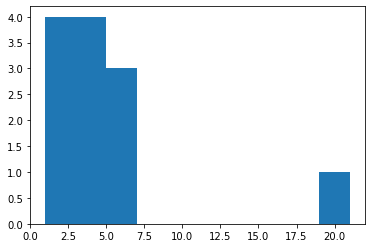

In [84]:
plt.hist(values)

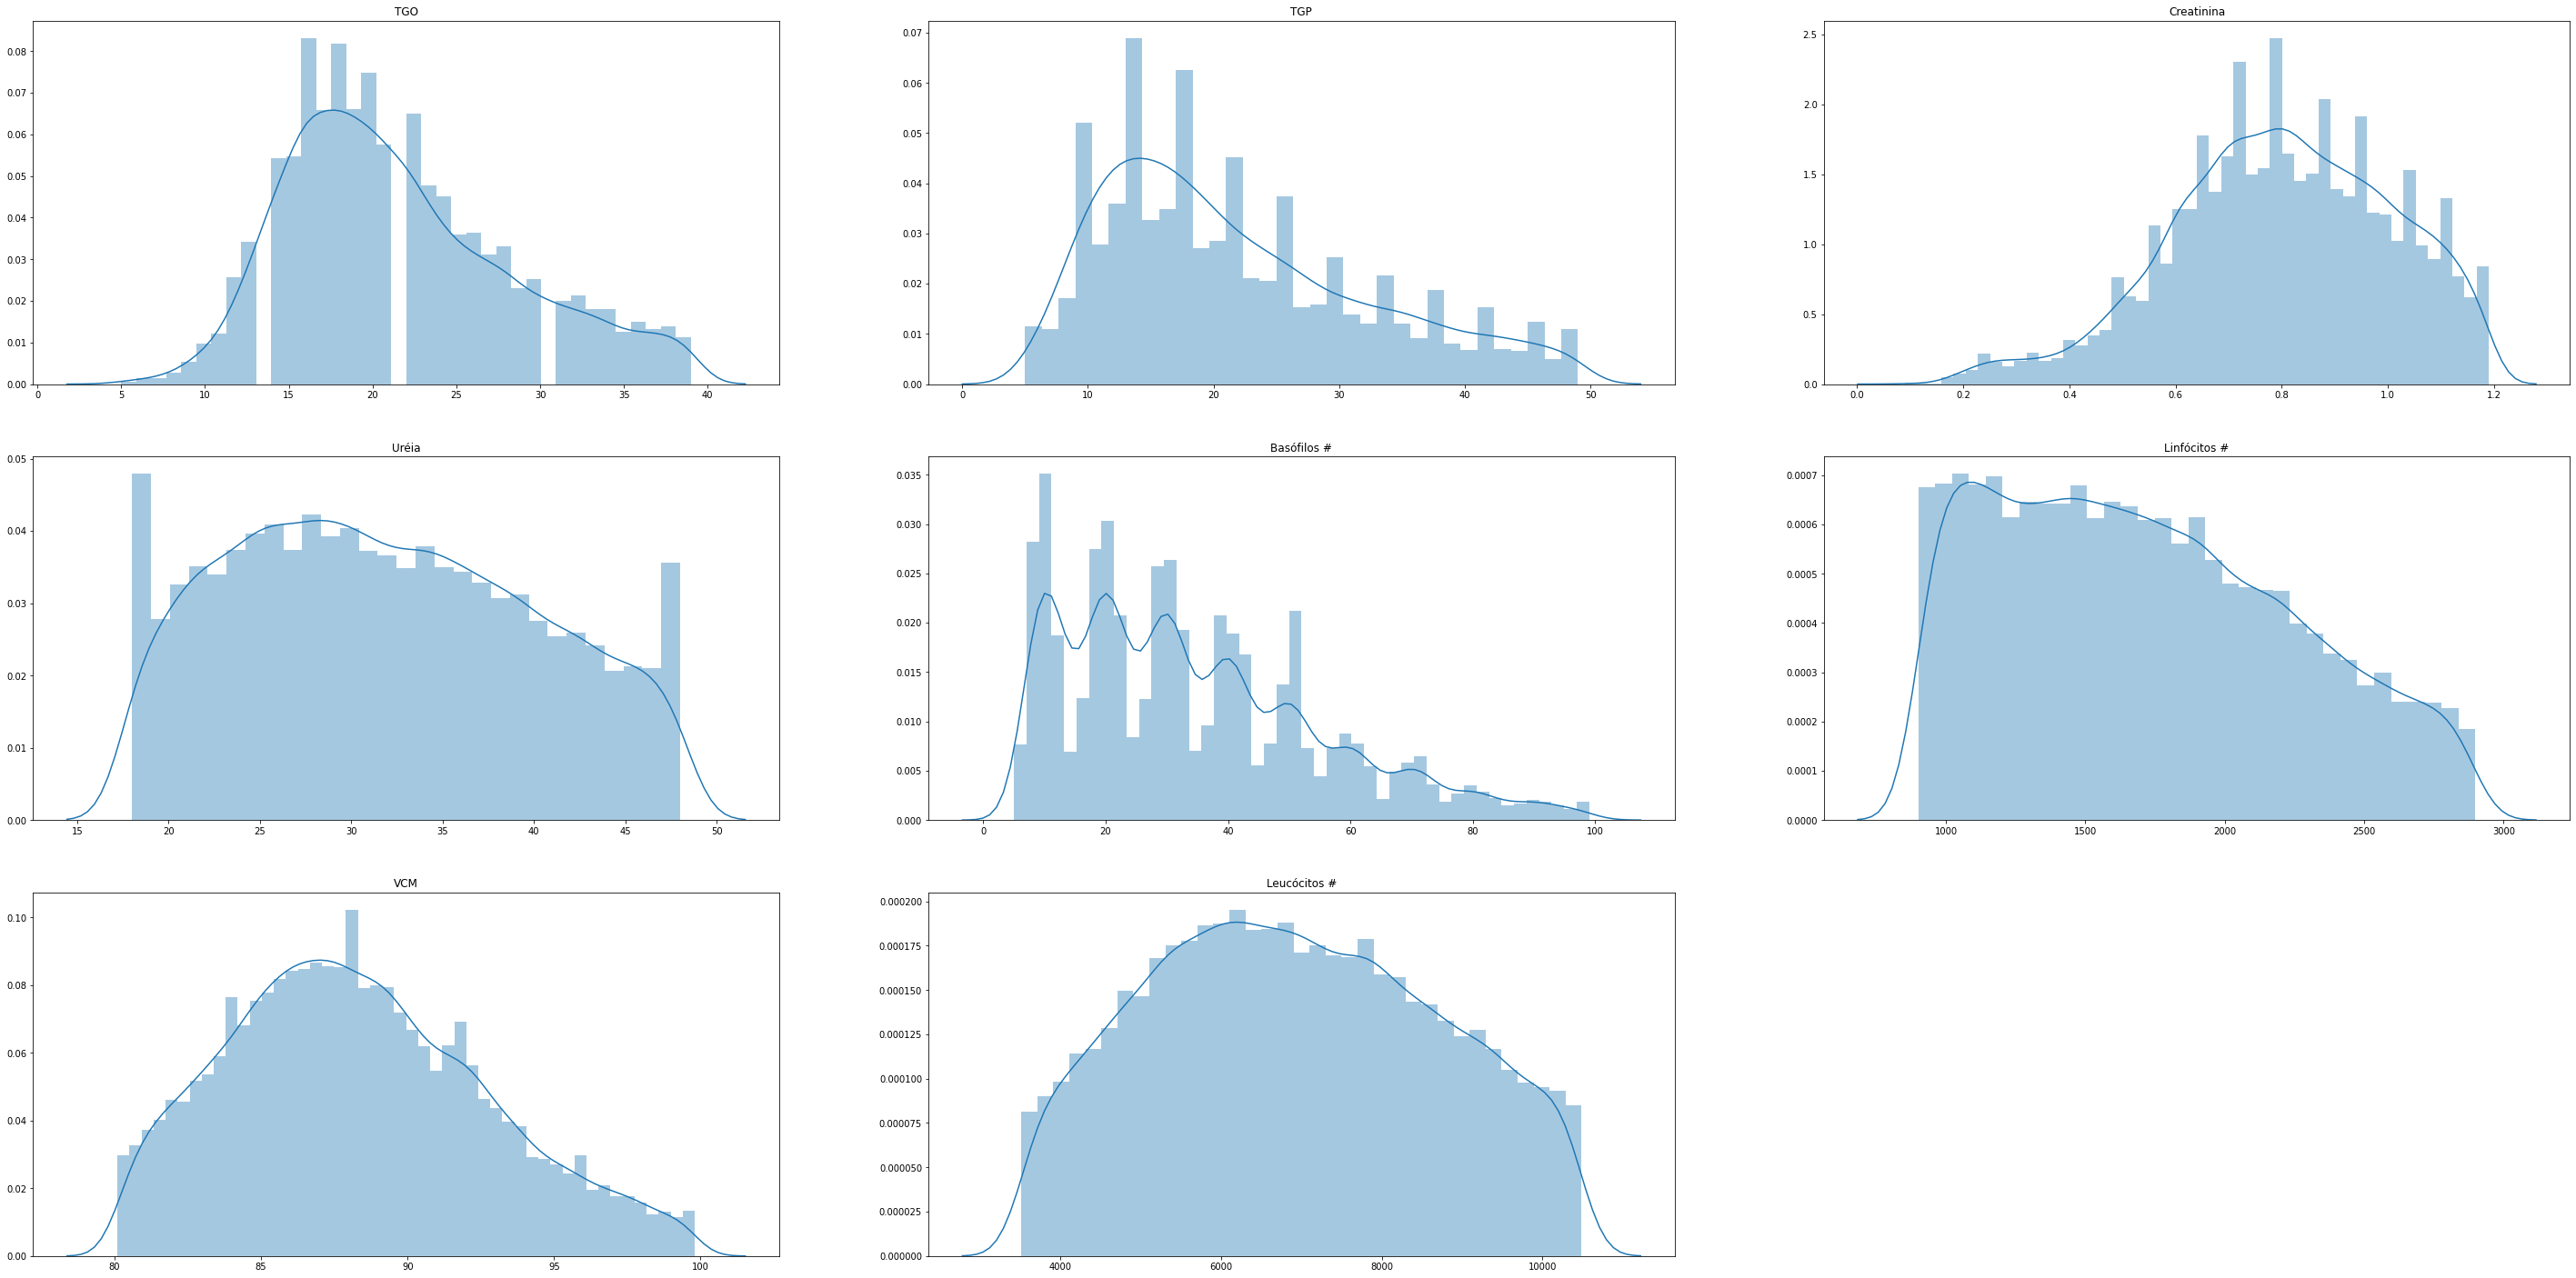

In [97]:
import seaborn as sbn
fig = plt.figure(figsize=[50,25])
for i in range(0,8):
    plt.subplot(3,3,i+1)
    sbn.distplot( filtered_values[i])
    plt.title(titles[i])
plt.show()

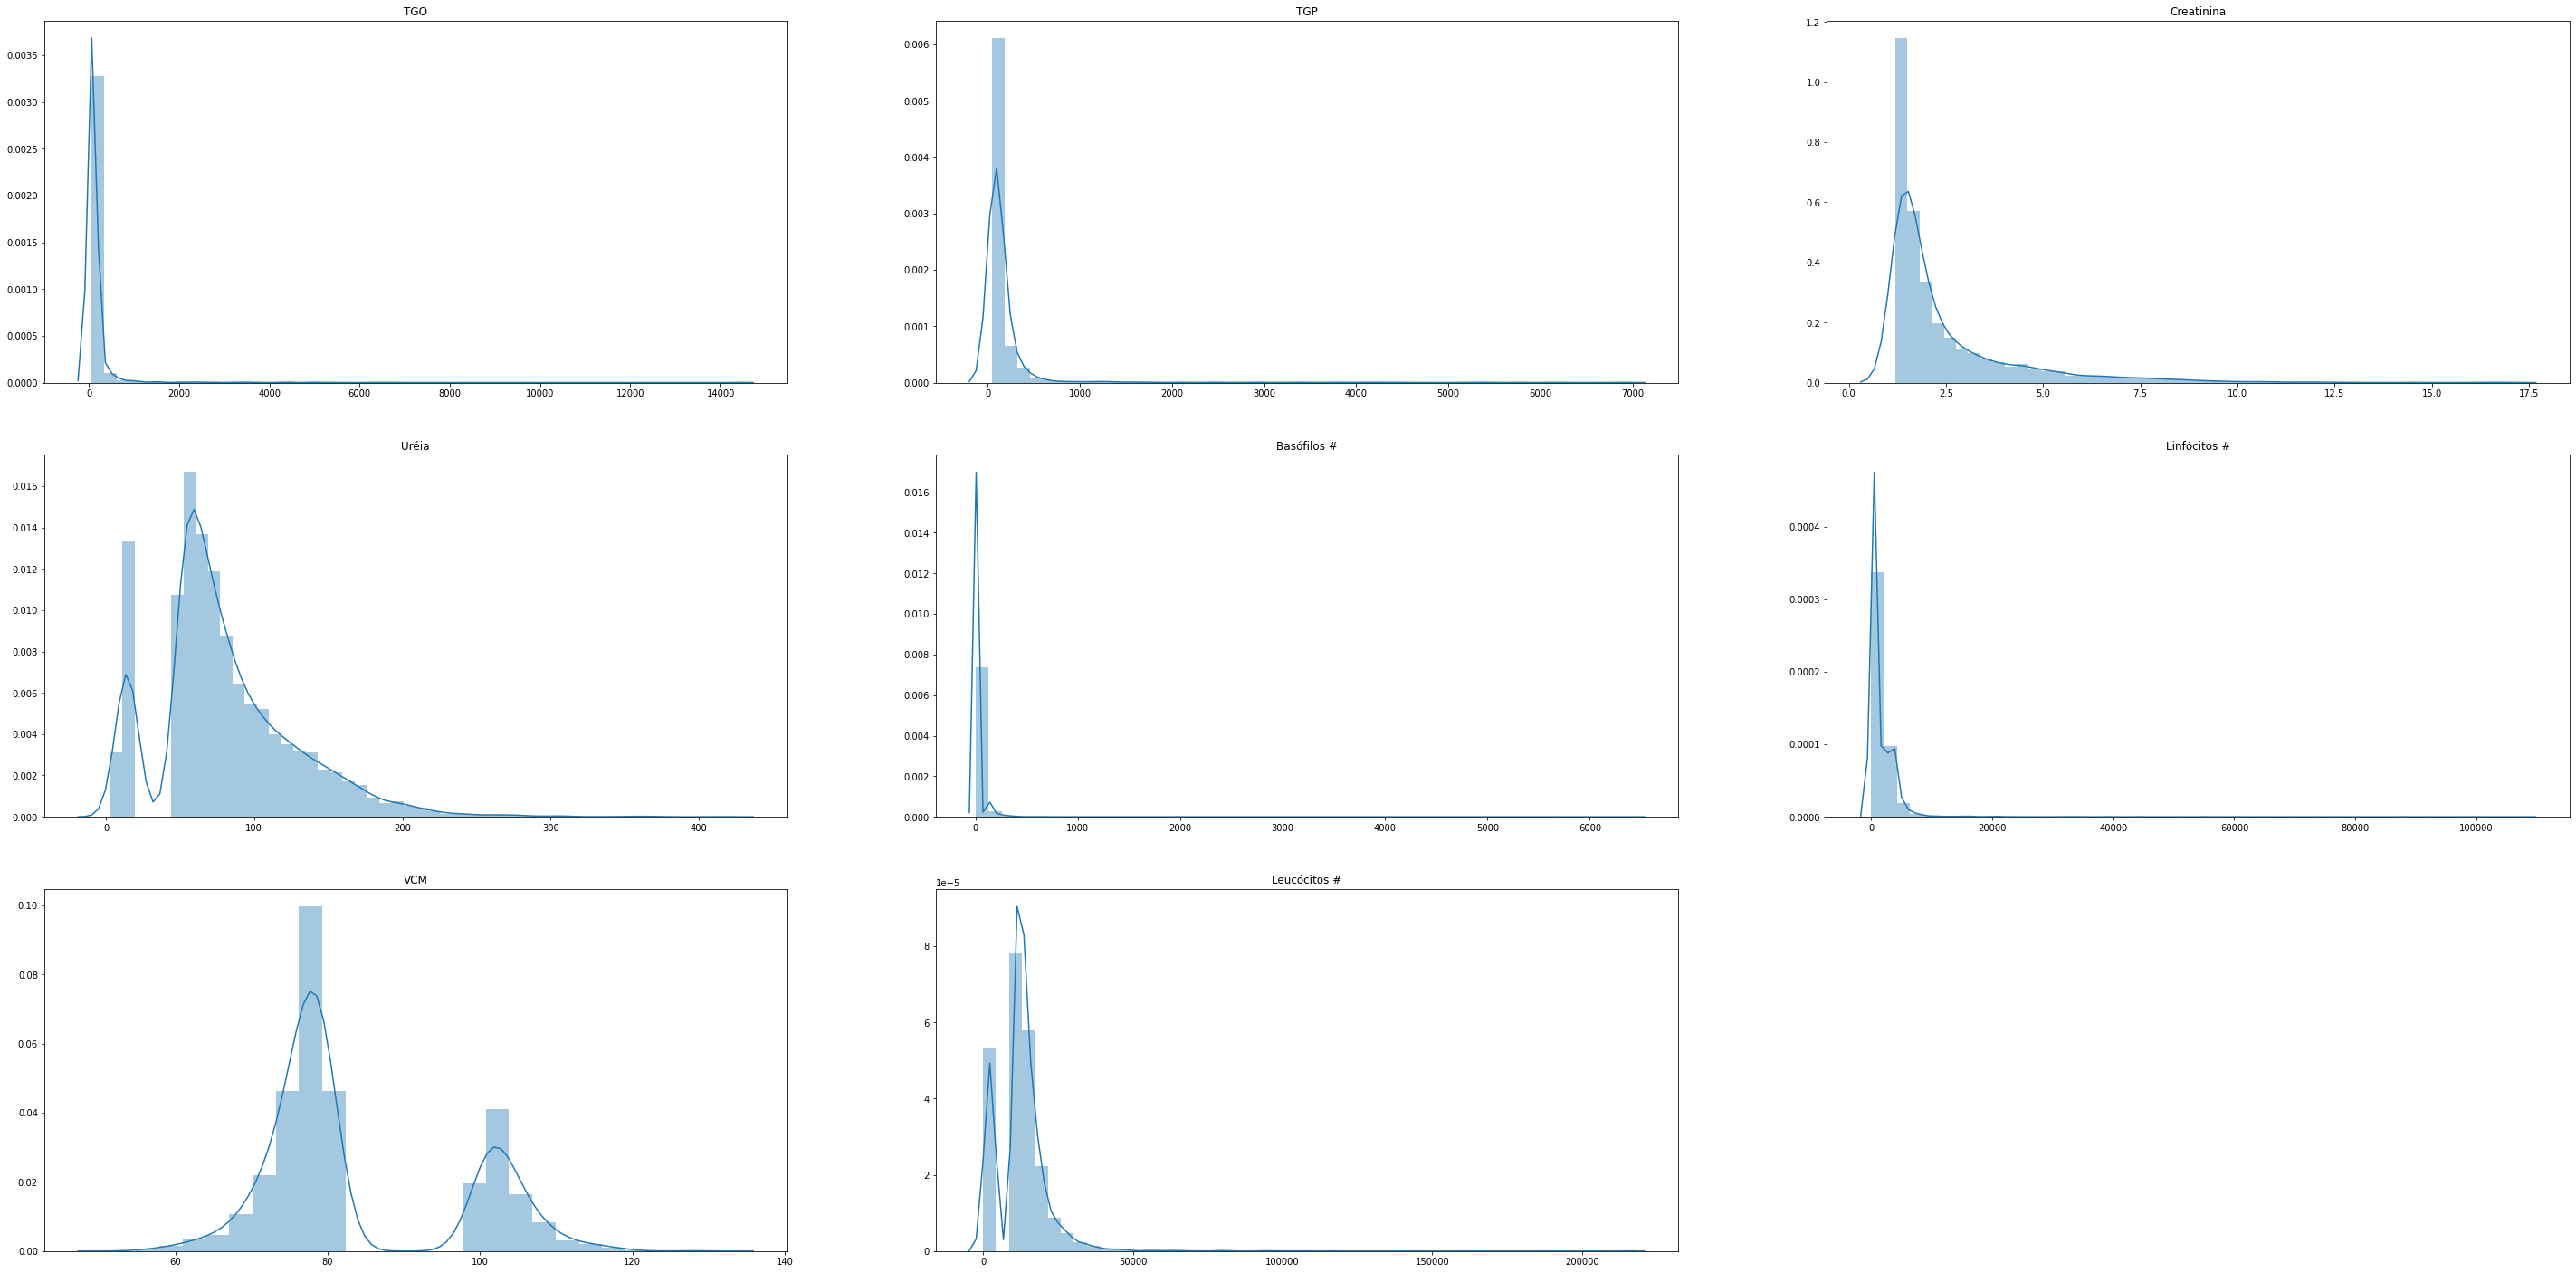

In [111]:
import seaborn as sbn
fig = plt.figure(figsize=[50,25])
for i in range(0,8):
    plt.subplot(3,3,i+1)
    sbn.distplot( outside[i])
    plt.title(titles[i])
plt.show()

In [91]:
for obs in observed:
    print(obs, total[ total['de_analito'].str[:] == obs]['cd_unidade'].unique())

TGO ['U/L' nan]
TGP ['U/L' nan]
Neutrófilos # []
Creatinina ['mg/dL' nan]
Uréia ['mg/dL']
Basófilos # ['µL']
Eosinófilos # []
Monócito # []
Linfócitos # ['µL']
VCM ['fL']
Leucócitos # ['µL']


In [75]:
import numpy as np 
  
  
# 1D array  
arr = [20, 2, 7, 1, 34] 
  
print("arr : ", arr)  
print("Q2 quantile of arr : ", np.quantile(arr, .50)) 
print("Q1 quantile of arr : ", np.quantile(arr, .25)) 
print("Q3 quantile of arr : ", np.quantile(arr, .75)) 
print("100th quantile of arr : ", np.quantile(arr, .1))  

arr :  [20, 2, 7, 1, 34]
Q2 quantile of arr :  7.0
Q1 quantile of arr :  2.0
Q3 quantile of arr :  20.0
100th quantile of arr :  1.4


In [135]:
qqq = pd.concat(qqq,axis=1)
# qqq.columns = ['TGO+','TGO-','TGP+','TGP-','Neutrófilos #+','Neutrófilos #-','Creatinina+','Creatinina-','Uréia+','Uréia-','Basófilos #+','Basófilos #-','Eosinófilos #+','Eosinófilos #-','Monócito #+','Monócito #-','Linfócitos #+','Linfócitos #-','VCM+','VCM-','Leucócitos #+','Leucócitos #-']

In [136]:
qqq.columns = ['TGO+','TGO-','TGP+','TGP-','Creatinina+','Creatinina-','Uréia+','Uréia-','Basófilos #+','Basófilos #-','Linfócitos #+','Linfócitos #-','VCM+','VCM-','Leucócitos #+','Leucócitos #-']

In [137]:
qqq[[qqq.columns[0],qqq.columns[1],qqq.columns[2],qqq.columns[3],qqq.columns[4],qqq.columns[5],qqq.columns[6],qqq.columns[7]]]

,TGO+,TGO-,TGP+,TGP-,Creatinina+,Creatinina-,Uréia+,Uréia-
count,1636.000000,4271.000000,1459.000000,2890.000000,1108.000000,2291.000000,1045.000000,1792.000000
mean,47.157702,38.376258,56.485949,46.446021,1.321273,1.251846,59.453589,52.316406
std,8.416574,11.217504,10.788288,10.514558,0.068981,0.067699,2.818079,2.312010
min,36.000000,26.000000,42.000000,33.000000,1.220000,1.150000,55.000000,49.000000
25%,40.000000,29.000000,47.000000,37.000000,1.260000,1.190000,57.000000,50.000000
50%,46.000000,35.000000,54.000000,44.000000,1.310000,1.250000,59.000000,52.000000
75%,53.000000,45.000000,65.000000,54.000000,1.380000,1.310000,62.000000,54.000000
max,65.000000,68.000000,80.000000,71.000000,1.450000,1.380000,64.000000,56.000000


In [138]:
qqq[[qqq.columns[8],qqq.columns[9],qqq.columns[10],qqq.columns[11],qqq.columns[12],qqq.columns[13],qqq.columns[14],qqq.columns[15]]]

,Basófilos #+,Basófilos #-,Linfócitos #+,Linfócitos #-,VCM+,VCM-,Leucócitos #+,Leucócitos #-
count,1737.000000,4837.000000,2445.000000,5382.000000,1565.000000,3040.000000,1666.000000,3527.000000
mean,22.232585,29.428365,1491.857260,1692.184132,87.833291,87.787303,8948.157263,8689.393252
std,2.155268,3.271883,94.906456,126.213389,0.340167,0.371345,371.001277,353.707012
min,20.000000,23.000000,1337.000000,1479.000000,87.300000,87.200000,8350.000000,8110.000000
25%,21.000000,27.000000,1410.000000,1582.000000,87.600000,87.500000,8620.000000,8380.000000
50%,22.000000,30.000000,1490.000000,1690.000000,87.800000,87.800000,8930.000000,8670.000000
75%,23.000000,32.000000,1571.000000,1800.000000,88.100000,88.100000,9270.000000,8990.000000
max,27.000000,36.000000,1663.000000,1914.000000,88.400000,88.400000,9620.000000,9330.000000
